In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
# computing the values analyticaly for comparison
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

#internal energy
e = -J*( th + ch*thN )/( 1 + thN )

#heat capacity
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

h=0.02 #external field
b = 1/T

#magnetizasion
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

#susceptibility
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

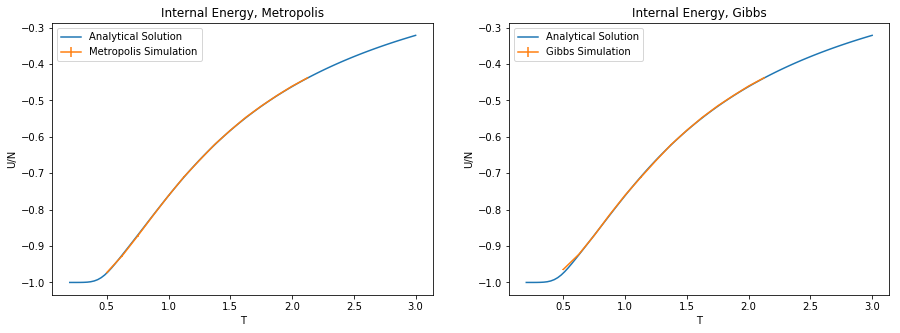

In [12]:
em = np.loadtxt("out.m.ene.dat")
eg = np.loadtxt("out.g.ene.dat")

plt.figure(figsize = (15,5))

plt.subplot(121)
plt.plot(T, e, label = "Analytical Solution")
plt.errorbar(em[:,0], em[:,1], yerr = em[:,2], label = "Metropolis Simulation")
plt.legend()
plt.title('Internal Energy, Metropolis')
plt.xlabel('T')
plt.ylabel('U/N')

plt.subplot(122)
plt.plot(T, e, label = "Analytical Solution")
plt.errorbar(eg[:,0], eg[:,1], yerr = eg[:,2], label = "Gibbs Simulation")
plt.legend()
plt.title('Internal Energy, Gibbs')
plt.xlabel('T')
plt.ylabel('U/N')

plt.show()

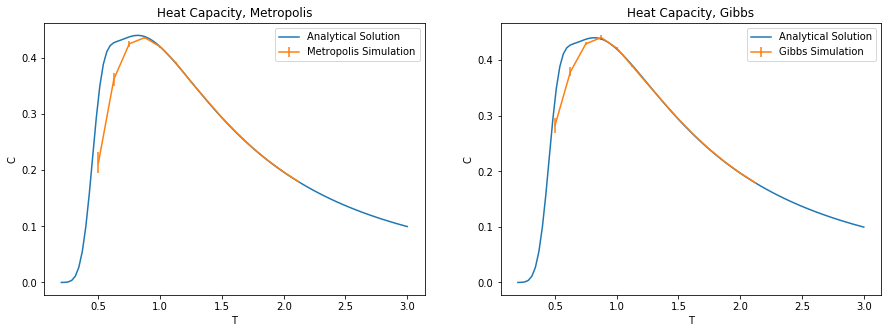

In [13]:
hm = np.loadtxt("out.m.hea.dat")
hg = np.loadtxt("out.g.hea.dat")

plt.figure(figsize = (15,5))

plt.subplot(121)
plt.plot(T, heat, label = "Analytical Solution")
plt.errorbar(hm[:,0], hm[:,1], yerr = hm[:,2], label = "Metropolis Simulation")
plt.legend()
plt.title('Heat Capacity, Metropolis')
plt.xlabel('T')
plt.ylabel('C')
#plt.xlim(0.3,2.2)

plt.subplot(122)
plt.plot(T, heat, label = "Analytical Solution")
plt.errorbar(hg[:,0], hg[:,1], yerr = hg[:,2], label = "Gibbs Simulation")
plt.legend()
plt.title('Heat Capacity, Gibbs')
plt.xlabel('T')
plt.ylabel('C')
#plt.xlim(0.3,2.2)

plt.show()

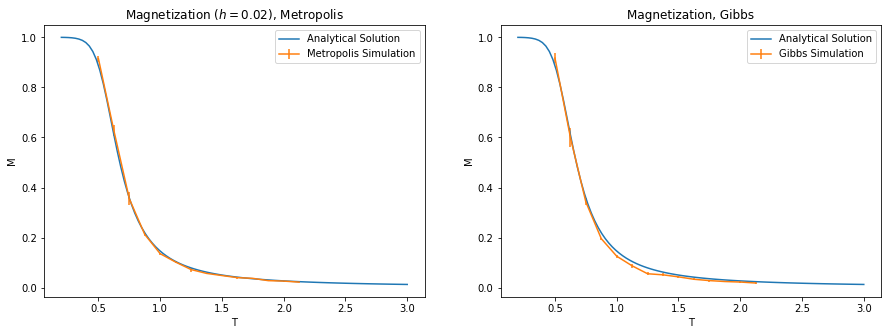

In [14]:
mm = np.loadtxt("out.m.mag.dat")
mg = np.loadtxt("out.g.mag.dat")

plt.figure(figsize = (15,5))

plt.subplot(121)
plt.plot(T, M, label = "Analytical Solution")
plt.errorbar(mm[:,0], mm[:,1], yerr = mm[:,2], label = "Metropolis Simulation")
plt.legend()
plt.title('Magnetization $(h = 0.02)$, Metropolis')
plt.xlabel('T')
plt.ylabel('M')

plt.subplot(122)
plt.plot(T, M, label = "Analytical Solution")
plt.errorbar(mg[:,0], mg[:,1], yerr = mg[:,2], label = "Gibbs Simulation")
plt.legend()
plt.title('Magnetization, Gibbs')
plt.xlabel('T')
plt.ylabel('M')

plt.show()

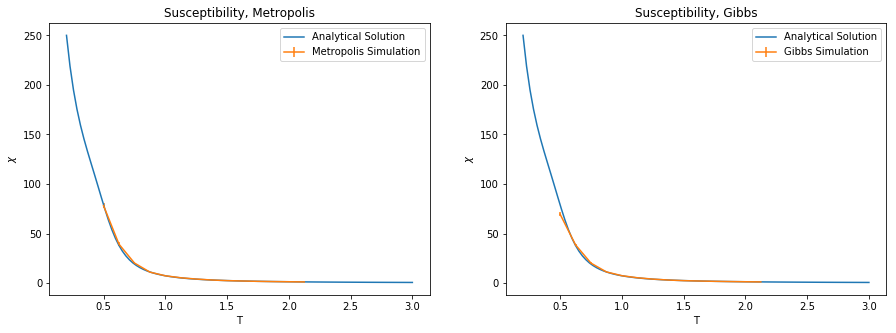

In [15]:
xm = np.loadtxt("out.m.chi.dat")
xg = np.loadtxt("out.g.chi.dat")

plt.figure(figsize = (15,5))

plt.subplot(121)
plt.plot(T, X, label = "Analytical Solution")
plt.errorbar(xm[:,0], xm[:,1], yerr = xm[:,2], label = "Metropolis Simulation")
plt.legend()
plt.title('Susceptibility, Metropolis')
plt.xlabel('T')
plt.ylabel('$\chi$')
#plt.xlim(0.3,2.2)

plt.subplot(122)
plt.plot(T, X, label = "Analytical Solution")
plt.errorbar(xg[:,0], xg[:,1], yerr = xg[:,2], label = "Gibbs Simulation")
plt.legend()
plt.title('Susceptibility, Gibbs')
plt.xlabel('T')
plt.ylabel("$\chi$")
#plt.xlim(0.3,2.2)

plt.show()

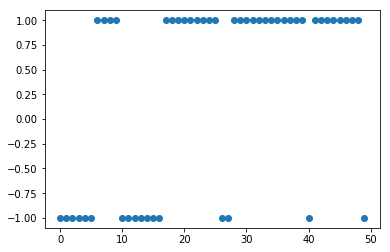

In [16]:
fin = np.loadtxt("config.final")

plt.plot(fin,"o")
plt.show()